In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random


In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/SNA/roadNet-TX.txt"


In [4]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'roadNet-TX.txt'],
 ['#', 'Texas', 'road', 'network'],
 ['#', 'Nodes:', '1379917', 'Edges:', '3843320'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['0', '1'],
 ['0', '2'],
 ['0', '29'],
 ['1', '0'],
 ['1', '23'],
 ['1', '32'],
 ['2', '0'],
 ['2', '26'],
 ['2', '34'],
 ['29', '0'],
 ['29', '337'],
 ['29', '358'],
 ['23', '1'],
 ['23', '13'],
 ['23', '24'],
 ['32', '1'],
 ['26', '2'],
 ['26', '33'],
 ['34', '2'],
 ['34', '33'],
 ['34', '53'],
 ['3', '4'],
 ['3', '7'],
 ['3', '40'],
 ['4', '3'],
 ['4', '18'],
 ['4', '19'],
 ['7', '3'],
 ['7', '5'],
 ['7', '16'],
 ['7', '17'],
 ['40', '3'],
 ['40', '16'],
 ['40', '39'],
 ['40', '179'],
 ['18', '4'],
 ['18', '179'],
 ['19', '4'],
 ['19', '6'],
 ['19', '17'],
 ['5', '6'],
 ['5', '7'],
 ['5', '10'],
 ['6', '5'],
 ['6', '11'],
 ['6', '19'],
 ['10', '5'],
 ['10', '8'],
 ['10', '11'],
 ['11', '6'],
 ['11', '9'],
 ['11', '10'],
 ['16',

In [5]:
#Taking 1000 random samples from data
sample = random.sample(res, 1000)
filename=open('data1.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [6]:
sample

[['1103262', '1095406'],
 ['784053', '783390'],
 ['300651', '300762'],
 ['127450', '127436'],
 ['1207722', '1207724'],
 ['865420', '865419'],
 ['960817', '960819'],
 ['1286344', '1285333'],
 ['403477', '403460'],
 ['1131017', '1131002'],
 ['762153', '767622'],
 ['24', '23'],
 ['165478', '165477'],
 ['633479', '633478'],
 ['531646', '531649'],
 ['588074', '588073'],
 ['801786', '801796'],
 ['329788', '329787'],
 ['867091', '867232'],
 ['1382811', '1382790'],
 ['675370', '675369'],
 ['744547', '744754'],
 ['1317130', '1317133'],
 ['430824', '430820'],
 ['1368741', '1368742'],
 ['816758', '816746'],
 ['46882', '47780'],
 ['717793', '717847'],
 ['1323686', '1323682'],
 ['870871', '870878'],
 ['555086', '554771'],
 ['141882', '141886'],
 ['752589', '752593'],
 ['945261', '945257'],
 ['355370', '355411'],
 ['1269974', '1275966'],
 ['52199', '53397'],
 ['469932', '469756'],
 ['1030435', '1030436'],
 ['777346', '777347'],
 ['1133774', '1133733'],
 ['313366', '313371'],
 ['38994', '38970'],
 ['

In [7]:
G1=nx.read_edgelist('data1.txt',nodetype=int,create_using=nx.DiGraph())
G2=nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
print(nx.info(G1))


Name: 
Type: DiGraph
Number of nodes: 1141
Number of edges: 571
Average in degree:   0.5004
Average out degree:   0.5004


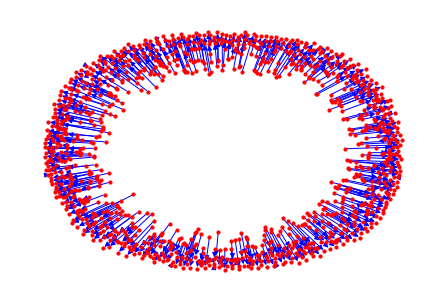

In [8]:
nx.draw(G1, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

In [9]:
#Degree Centrality
# In Degree
indegree = G1.degree()
print("Maximum indegree:")
index = max(nx.in_degree_centrality(G1),key=(nx.in_degree_centrality(G1)).get)
value = indegree[index]
print("\nNode Degree")
weight = 1
for p,q in indegree:
  if q == value and weight <= 5:
    print(str(p)+"\t"+str(q))
    weight += 1
print("Degree of some nodes:")
print("\nNode    Degree")
weight = 1
for p,q in indegree:
  if weight <= 5:
    print(str(p)+"\t"+str(q))
    weight=weight+1

Maximum indegree:

Node Degree
1103262	1
1095406	1
784053	1
783390	1
300651	1
Degree of some nodes:

Node    Degree
1103262	1
1095406	1
784053	1
783390	1
300651	1


In [10]:
# Out Degree
outdegree = G1.degree()
print ("Maximum degree centrality:")
index = max(nx.out_degree_centrality(G1),key=(nx.out_degree_centrality(G1)).get)
val = outdegree[index]
print("Node Degree")
w = 1
for p,q in outdegree:
  if q == val and w <= 5:
    print(str(p)+"\t"+str(q))
    w += 1
print("\nDegree of some nodes:")
w = 1
print("\nNode   Degree")
for p,q in outdegree:
  if(w <= 5):
    print(str(p)+"\t"+str(q))
    w=w+1

Maximum degree centrality:
Node Degree
1103262	1
1095406	1
784053	1
783390	1
300651	1

Degree of some nodes:

Node   Degree
1103262	1
1095406	1
784053	1
783390	1
300651	1


In [11]:
#eigen vector centrality
eigen_cent = nx.eigenvector_centrality_numpy(G1)
maximum = max(eigen_cent.values())
print("Maximum eigen centrality are :")
print("Node Eigen Vector Centrality")
for node in eigen_cent.keys():
  if (eigen_cent[node] == maximum):
    print(f'{node}\t {eigen_cent[node]}')
print("\nEigen Vector Centrality of some nodes are:\n")
print("Node \t Eigen Vector Centrality")
# sorting based on values
eigen_cent_sorted = sorted(eigen_cent, key=eigen_cent.get, reverse=True)
w = 1
for q in eigen_cent:
  if(w <= 5):
    w = w + 1
    print (str(q)+"\t "+str(eigen_cent[q]))

Maximum eigen centrality are :
Node Eigen Vector Centrality
743624	 0.9999999998426481

Eigen Vector Centrality of some nodes are:

Node 	 Eigen Vector Centrality
1103262	 -2.5204008477809944e-13
1095406	 -4.98056257702268e-07
784053	 5.846217788676508e-13
783390	 1.1552719623500447e-06
300651	 -7.52171911730675e-14


In [12]:
#Katz Centrality
katz_cent = nx.katz_centrality(G1, max_iter = 20000)
index = max(nx.katz_centrality(G1, max_iter = 20000), key = (nx.katz_centrality(G1, max_iter = 20000)).get)
maximum = katz_cent[index]
print("The nodes with maximum Katz centrality are :")
print("\nNode Degree")
for node in katz_cent:
  if (katz_cent[node] == maximum):
    print(f'{node}\t{katz_cent[node]}')
print("\nSome nodes with their Katz Centrality are:")
print("\nNode Katz Centrality")
w = 1
for node in katz_cent:
  if(w <= 8):
    print(f'{node}\t{katz_cent[node]}')
    w = w + 1


The nodes with maximum Katz centrality are :

Node Degree
743624	0.031259147399265746

Some nodes with their Katz Centrality are:

Node Katz Centrality
1103262	0.02816139405339256
1095406	0.030977533458731818
784053	0.02816139405339256
783390	0.030977533458731818
300651	0.02816139405339256
300762	0.030977533458731818
127450	0.02816139405339256
127436	0.030977533458731818


In [13]:
#Page Rank
page_cent = nx.pagerank(G1, max_iter = 20000)
maximum = max(page_cent.values())
print("Maximum Page Rank centrality are :")
print("\nNode Page Rank Centrality")
for node in page_cent.keys():
  if (page_cent[node] == maximum):
    print(f'{node}\t{page_cent[node]}')
print("\nPage Rank Centrality of some nodes are:")
print("\nNode Page Rank Centrality")
w = 1
for node in page_cent:
  if(w <= 8):
    print(f'{node}\t{page_cent[node]}')
    w = w + 1


Maximum Page Rank centrality are :

Node Page Rank Centrality
743624	0.0015818833975369923

Page Rank Centrality of some nodes are:

Node Page Rank Centrality
1103262	0.00061487362828568
1095406	0.0011367371025958468
784053	0.00061487362828568
783390	0.0011367371025958468
300651	0.00061487362828568
300762	0.0011367371025958468
127450	0.00061487362828568
127436	0.0011367371025958468


In [14]:
#Betweeness Centrality
bet_cent = nx.betweenness_centrality(G1)
maximum = max(bet_cent.values())
print("Maximum Betweeness Centrality are :")
print("\nNode Betweeness Centrality")
for node in bet_cent:
  if (bet_cent[node] == maximum):
    print(f'{node}\t{bet_cent[node]}')
print("\nBetweeness Centrality of some nodes are:")
print("\nNode Betweenness Centrality")
w = 1
for res in bet_cent:
  if(w <= 5):
    w = w+1
    print(str(res)+"\t"+str(bet_cent[res]))

Maximum Betweeness Centrality are :

Node Betweeness Centrality
743641	7.701430925866026e-07

Betweeness Centrality of some nodes are:

Node Betweenness Centrality
1103262	0.0
1095406	0.0
784053	0.0
783390	0.0
300651	0.0


In [15]:
#Closeness Centrality
close_cent = nx.closeness_centrality(G1)
maximum = max(close_cent.values())
print("Maximum Closeness Centrality:")
print("\nNode Closeness Centrality")
for node in close_cent:
  if (close_cent[node] == maximum):
    print(f'{node}\t{close_cent[node]}')
print("\nCloseness Centrality of some nodes:")
print("\nNode Closeness Centrality")
dict_sorted_keys = sorted(close_cent, key=close_cent.get, reverse=True)
w = 1
for q in dict_sorted_keys:
  if(w <= 5):
    w = w+1
    print (str(q)+"\t"+str(close_cent[q]))

Maximum Closeness Centrality:

Node Closeness Centrality
743624	0.0011695906432748538

Closeness Centrality of some nodes:

Node Closeness Centrality
743624	0.0011695906432748538
1095406	0.0008771929824561404
783390	0.0008771929824561404
300762	0.0008771929824561404
127436	0.0008771929824561404


In [16]:
#Average local clustering coeffecient
average_local=nx.average_clustering(G2)

#Local clustering coeffecient of all nodes
print('\nClustering coeffecient of some nodes are:')
print('\nNode Local Clustering Coeffecient')
w = 1
for node, val in nx.clustering(G2).items():
  if(w <= 8):
    print(f'{node}\t{val}')
    w = w + 1


Clustering coeffecient of some nodes are:

Node Local Clustering Coeffecient
0	0
1	0
2	0
29	0
23	0
32	0
26	0
34	0


In [17]:
# global clustering coeffecient of nodes
global_cl=np.mean(list(nx.clustering(G2).values()))


In [18]:
#Reciprocity
reciprocity=nx.reciprocity(G2)


In [19]:
#Transitivity
transitivity=nx.transitivity(G2)


In [20]:
print("average local clustering coefficient:",average_local)
print("Global clustering coefficient:",global_cl)
print("Reciprocity:",reciprocity)
print("transitivity:",transitivity)

average local clustering coefficient: 0.0470046960946403
Global clustering coefficient: 0.04700469609460512
Reciprocity: 1.0
transitivity: 0.060224199223599666


In [21]:
#Random graph with following parameters
N = 500
average_degree = np.arange(0,5.1,0.1)
y_axis = []
for i in average_degree:
  p = i/(N-1)
  G = nx.erdos_renyi_graph(N,p,seed = 42)
  graphs = list(nx.connected_components(G))
  Ng = max(graphs, key=len)
  y_axis.append(len(Ng)/N)

In [35]:
# Finding Giant Component 
list1 = sorted(nx.strongly_connected_components(G1))
print("Number of nodes in the giant component = " + str(len(list1)) + '\n')
print("Set of nodes in the giant component:")
list1

Number of nodes in the giant component = 1141

Set of nodes in the giant component:


[{1095406},
 {1103262},
 {783390},
 {784053},
 {300762},
 {300651},
 {127436},
 {127450},
 {1207724},
 {1207722},
 {865419},
 {865420},
 {960819},
 {960817},
 {1285333},
 {1286344},
 {403460},
 {403477},
 {1131002},
 {1131017},
 {767622},
 {762153},
 {23},
 {24},
 {165477},
 {165478},
 {633478},
 {633479},
 {531649},
 {531646},
 {588073},
 {588074},
 {801796},
 {801786},
 {329787},
 {329788},
 {867232},
 {867091},
 {1382790},
 {1382811},
 {675369},
 {675370},
 {744754},
 {744547},
 {1317133},
 {1317130},
 {430820},
 {430824},
 {1368742},
 {1368741},
 {816746},
 {816758},
 {47780},
 {46882},
 {717847},
 {717793},
 {1323682},
 {1323686},
 {870878},
 {870871},
 {554771},
 {555086},
 {141886},
 {141882},
 {752593},
 {752589},
 {945257},
 {945261},
 {355411},
 {355370},
 {1275966},
 {1269974},
 {53397},
 {52199},
 {469756},
 {469932},
 {1030436},
 {1030435},
 {777347},
 {777346},
 {1133733},
 {1133774},
 {313371},
 {313366},
 {38970},
 {38994},
 {595597},
 {595595},
 {25485},
 {28873},
 {64

In [22]:
#Values <k> and Ng/N
print("<k>\t Ng/N")
for i in range(len(average_degree)):
  print ("{0:.1f}".format(average_degree[i]),'\t',y_axis[i])

<k>	 Ng/N
0.0 	 0.002
0.1 	 0.006
0.2 	 0.01
0.3 	 0.012
0.4 	 0.012
0.5 	 0.018
0.6 	 0.018
0.7 	 0.02
0.8 	 0.034
0.9 	 0.056
1.0 	 0.066
1.1 	 0.108
1.2 	 0.118
1.3 	 0.312
1.4 	 0.436
1.5 	 0.504
1.6 	 0.61
1.7 	 0.7
1.8 	 0.714
1.9 	 0.758
2.0 	 0.782
2.1 	 0.804
2.2 	 0.824
2.3 	 0.838
2.4 	 0.848
2.5 	 0.872
2.6 	 0.9
2.7 	 0.92
2.8 	 0.922
2.9 	 0.928
3.0 	 0.928
3.1 	 0.94
3.2 	 0.942
3.3 	 0.948
3.4 	 0.956
3.5 	 0.958
3.6 	 0.96
3.7 	 0.964
3.8 	 0.964
3.9 	 0.964
4.0 	 0.974
4.1 	 0.98
4.2 	 0.986
4.3 	 0.988
4.4 	 0.988
4.5 	 0.988
4.6 	 0.988
4.7 	 0.988
4.8 	 0.988
4.9 	 0.99
5.0 	 0.992


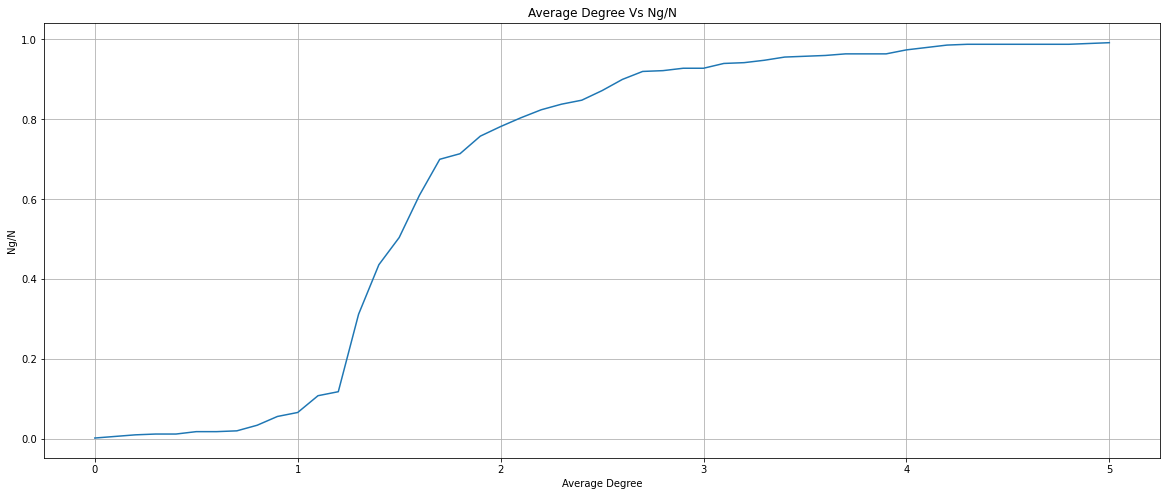

In [23]:
#Graph between <k> an Ng/N
plt.figure(figsize=(20,8))
plt.xlabel("Average Degree")
plt.ylabel("Ng/N")
plt.title("Average Degree Vs Ng/N")
plt.grid()
plt.plot(average_degree,y_axis)
plt.show()
